In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from oetils import init_plotting

In [2]:
W = init_plotting(latex=True, sans=True)

In [3]:
g = 9.81
H = 50e-2
data = pd.DataFrame({
    'p': [0.50, 1.00, 2.00, 3.00, 4.00],  # [atm]
    'R': [5.4, 6.5, 8.2, 9.7, 10.9]       # [m]
})
data.p = data.p * 1.013e5 / 1e3  # Convert atm to kPa
data

,p,R
0,50.65,5.4
1,101.30,6.5
2,202.60,8.2
3,303.90,9.7
4,405.20,10.9


In [4]:
# Least squares fit
x = np.stack([np.ones(len(data)), data.p]).T
y = data.R ** 2
w = np.linalg.lstsq(x, y, rcond=None)[0]

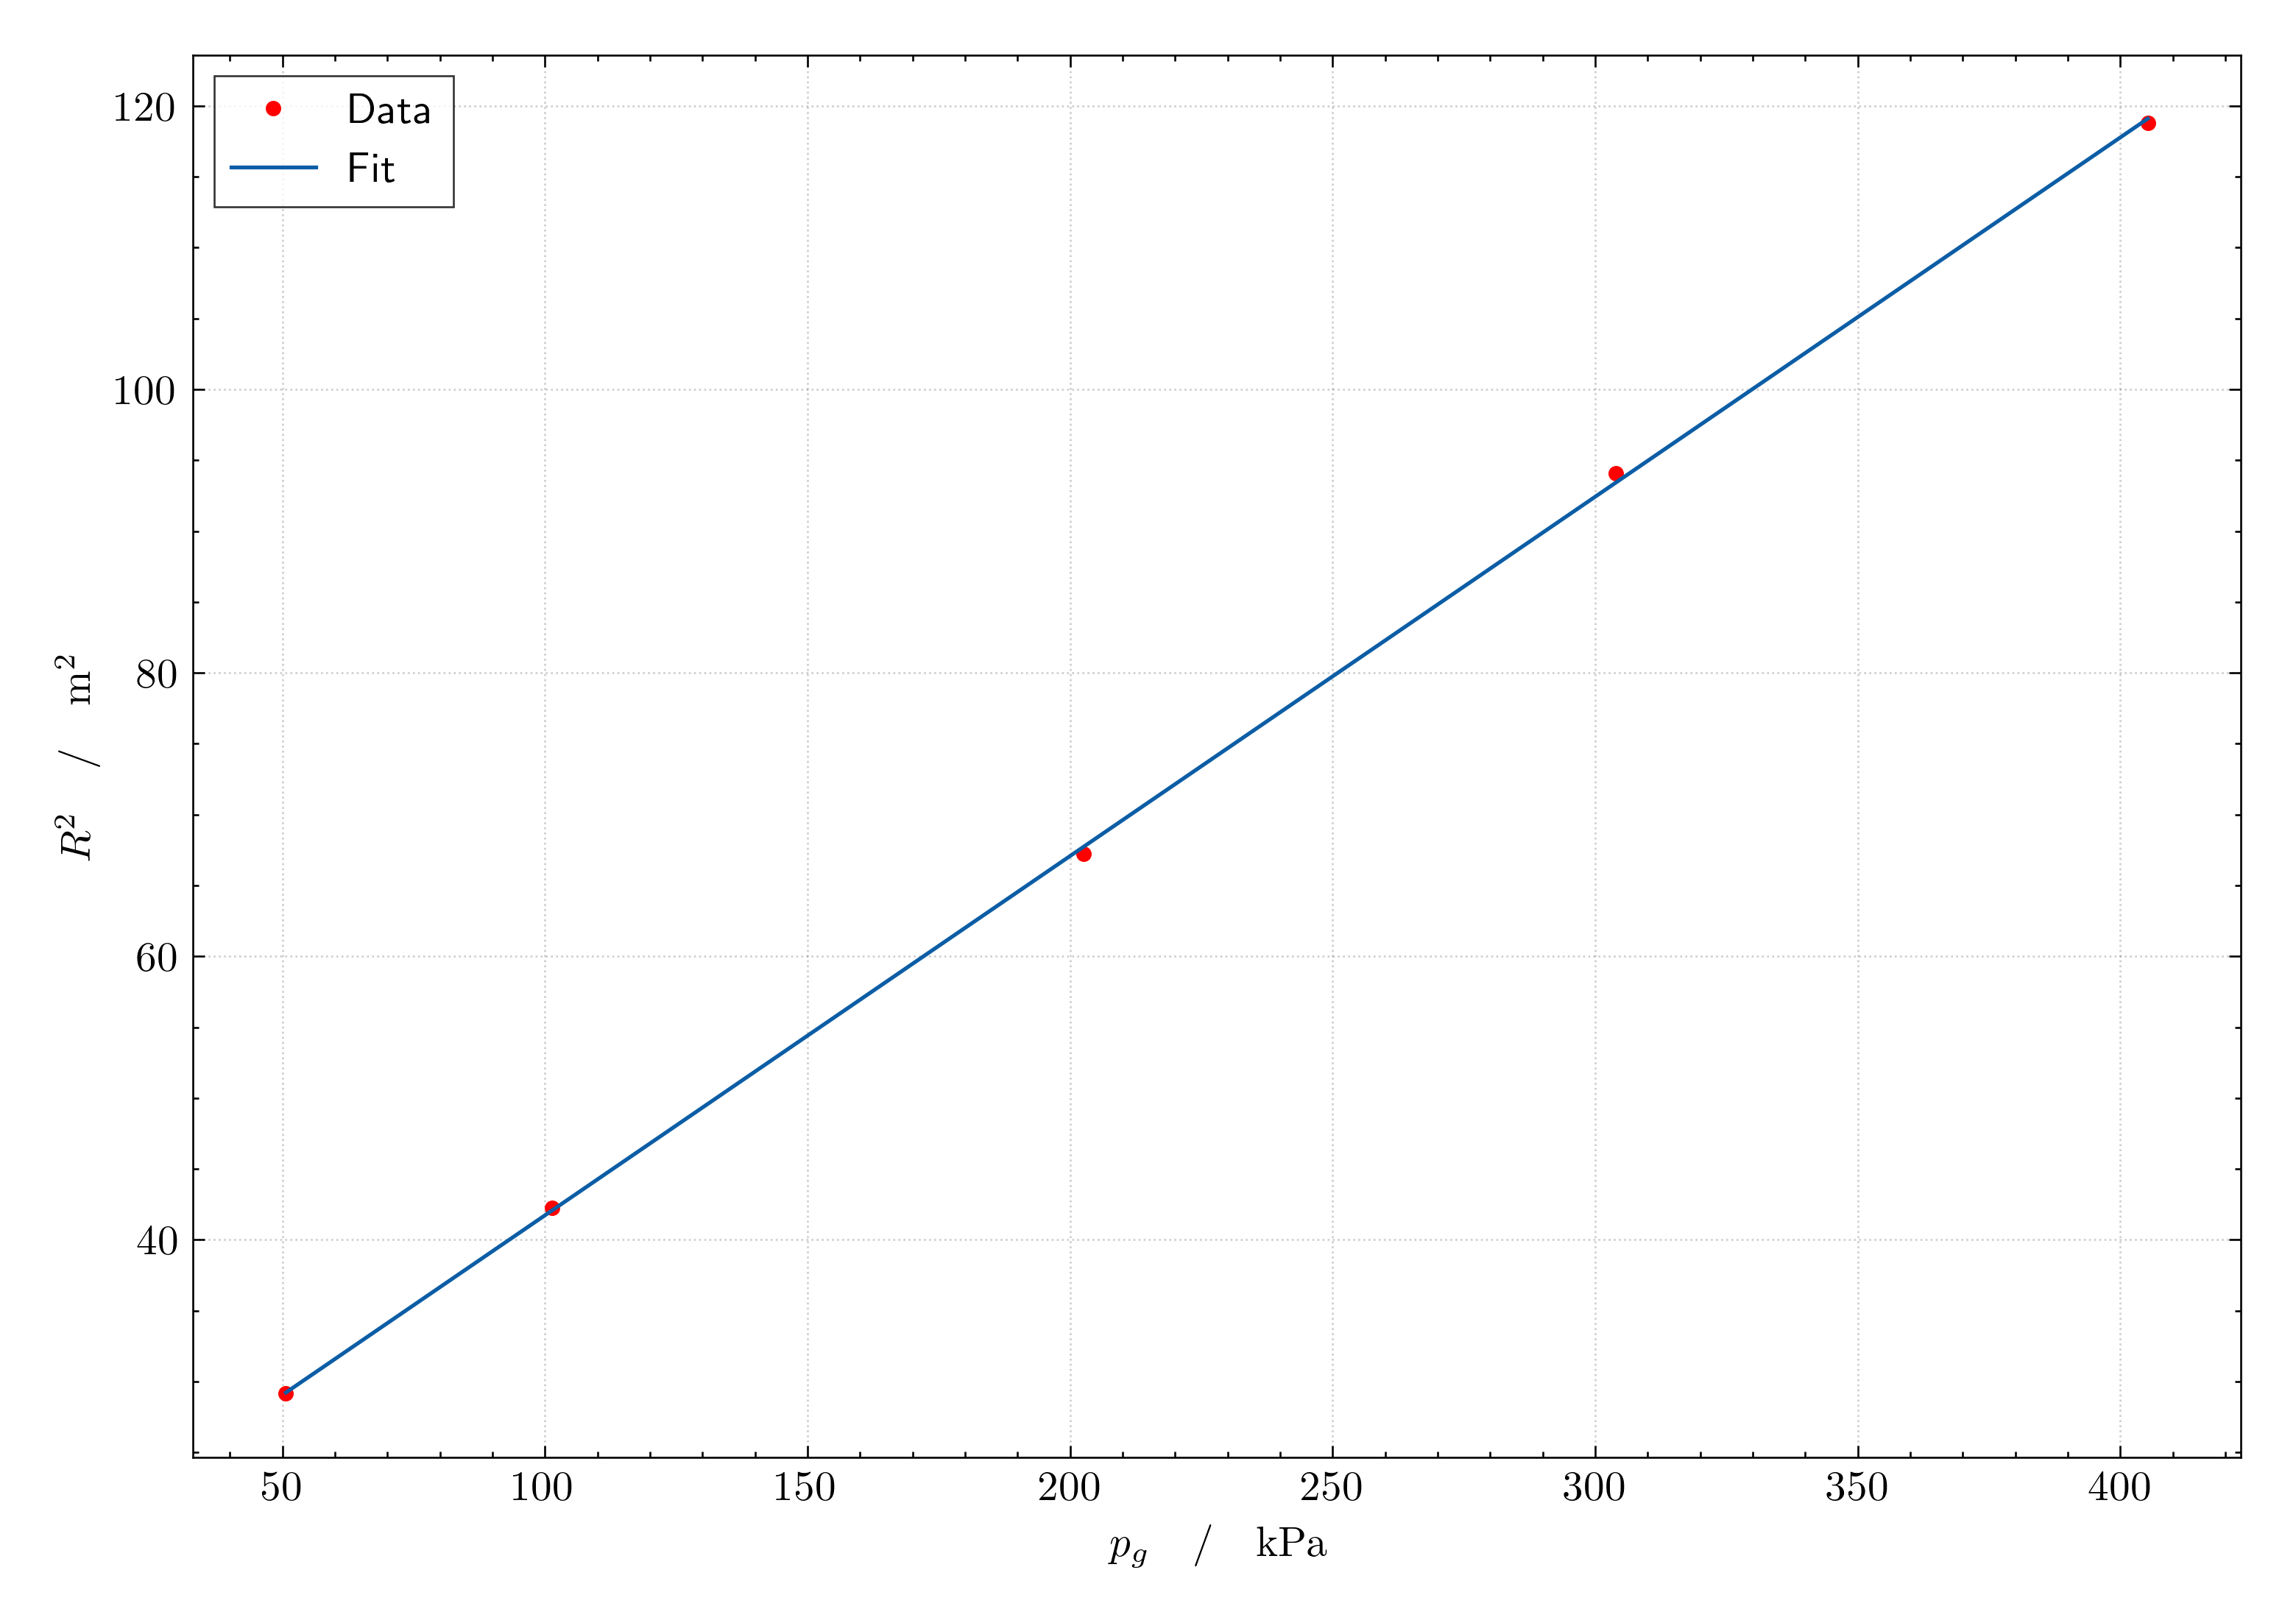

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$p_g\quad/\quad\mathrm{kPa}$")
ax.set_ylabel(r"$R^2\quad/\quad\mathrm{m^2}$")
ax.plot(data.p, data.R**2, 'r.', label="Data")
x = np.linspace(data.p.min(), data.p.max())
ax.plot(x, sum(w[i] * x**i for i in range(2)), label="Fit")
ax.legend()
plt.show()

In [6]:
# Compute h
h = w[0] / (4 * H)
print(f"Height of liquid: h = {h:.2g} m")

Height of liquid: h = 8.2 m


In [7]:
rho = 4 * H / (g * w[1])
print(f"Density of liquid: {rho:.2g} g / cm^3")

Density of liquid: 0.8 g / cm^3
